# Diabetes prediction

Name: Mridhula.k

Aim:
to determine if a person is suffering from diabetes or not.
this is done with the help the data set pima_diabetes.csv
the input parameters are no of Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age	the output parameters is Outcome with tells us the probability if a person has diabetes or not.

# Data Preprocessing 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

Plot of different features and their outcomes

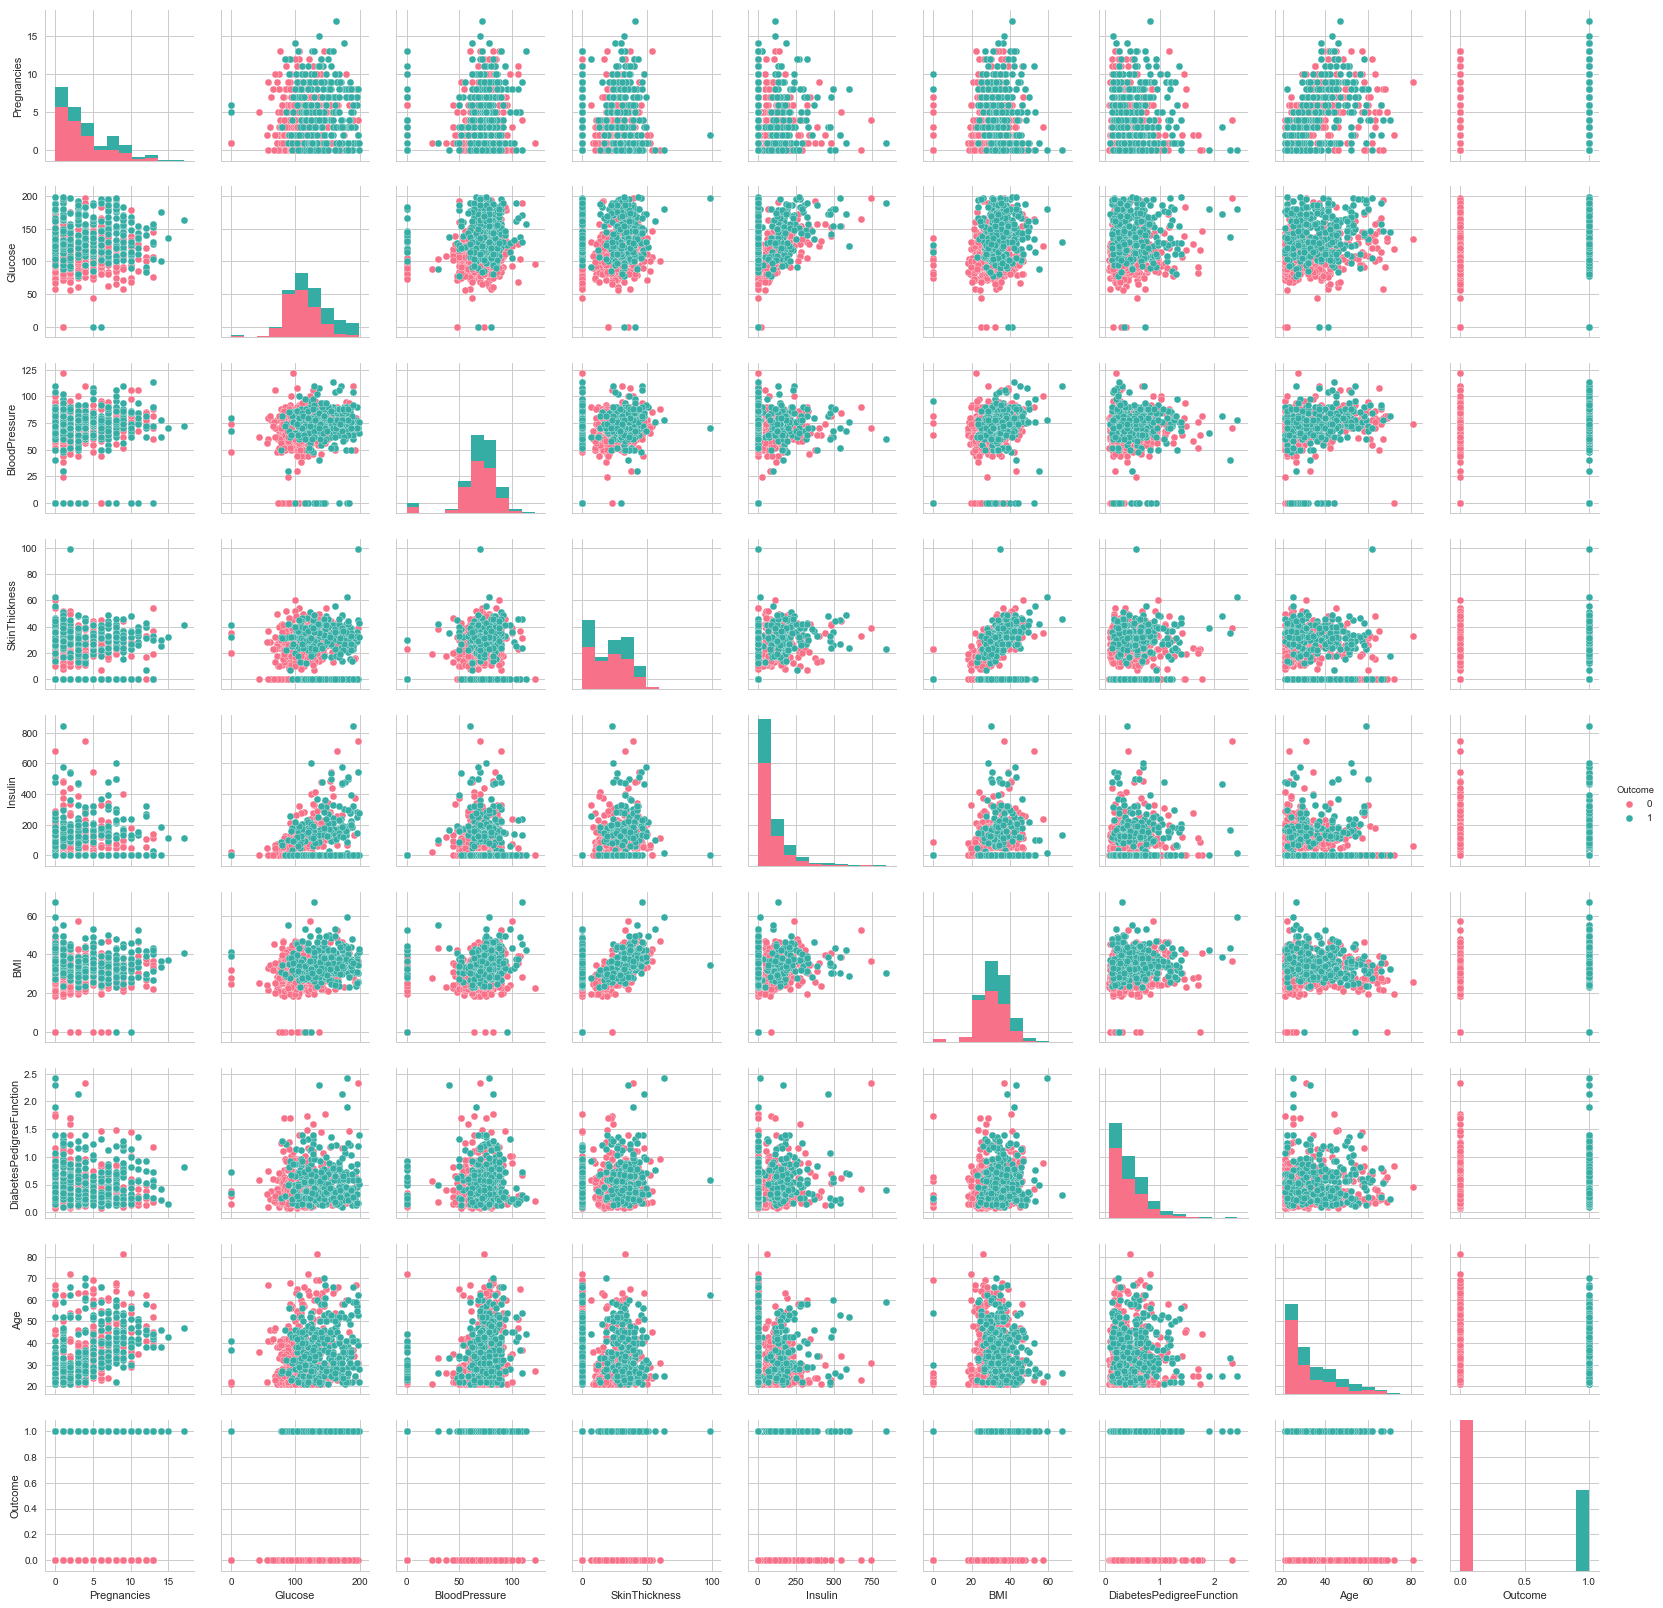

In [6]:
sb.pairplot(df.dropna(), hue='Outcome', palette="husl")
plt.show()

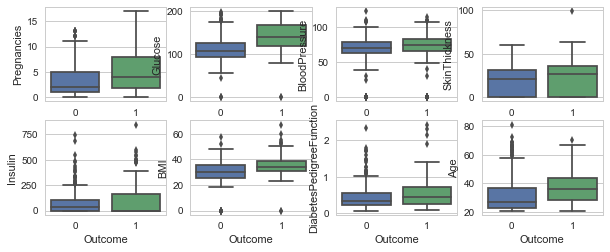

In [7]:
for column_index, column in enumerate(df.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    sb.boxplot(x='Outcome', y=column, data=df)

# Heatmap

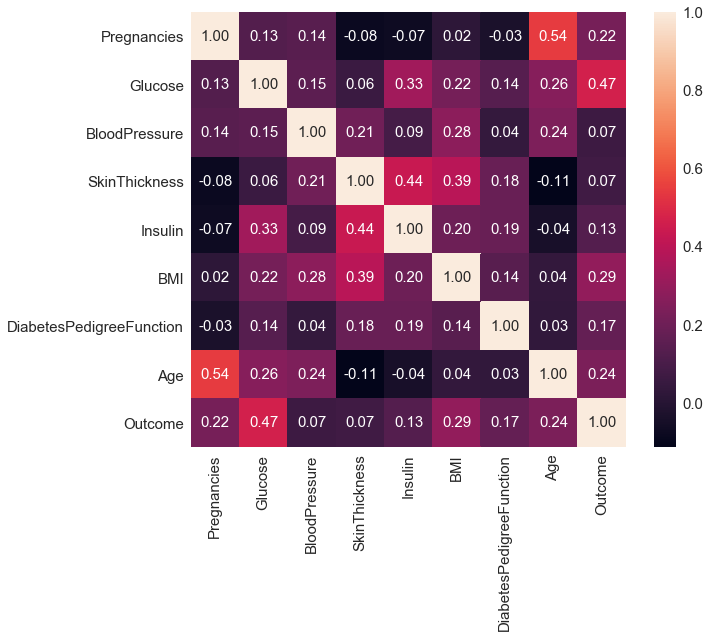

In [8]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()

# Output feature

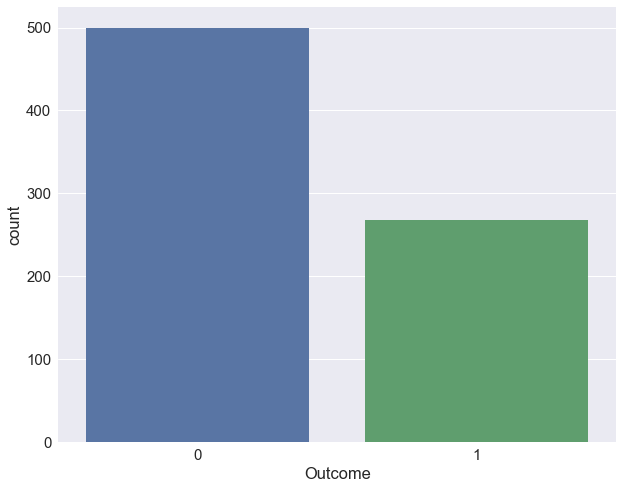

In [9]:
sb.countplot(x='Outcome',data=df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Input features

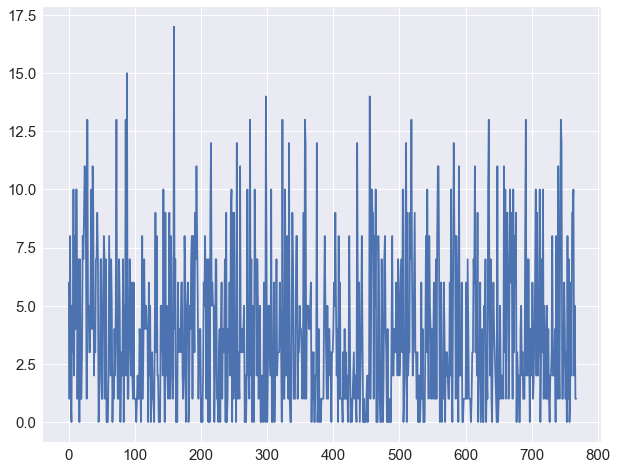

In [11]:
plt.plot(df.Pregnancies)

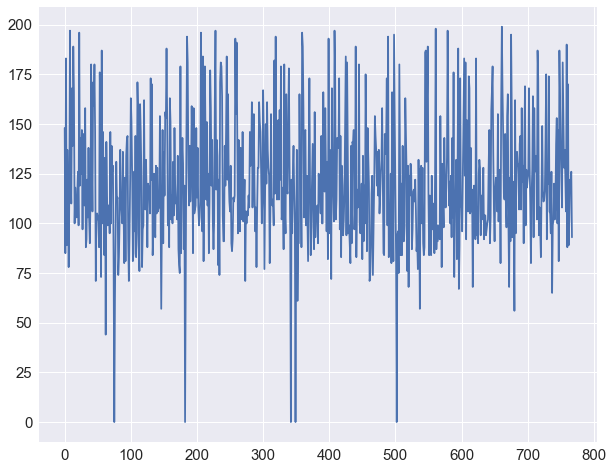

In [12]:
plt.plot(df.Glucose)

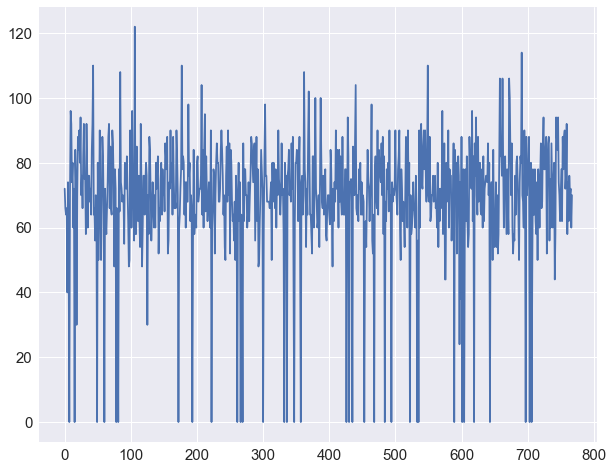

In [13]:
plt.plot(df.BloodPressure)

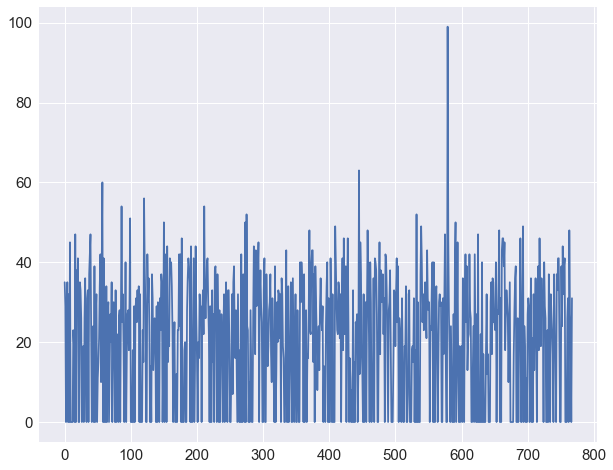

In [14]:
plt.plot(df.SkinThickness)

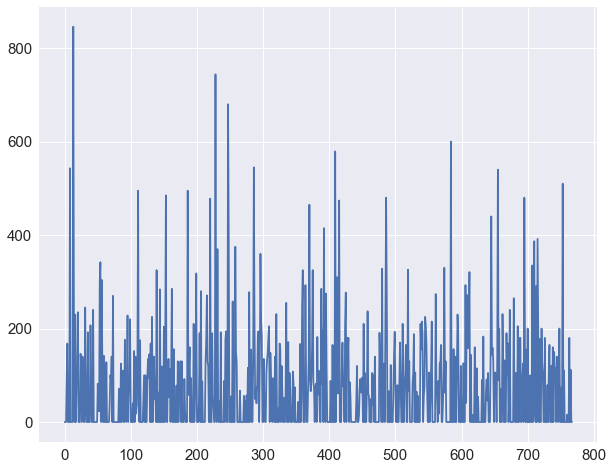

In [15]:
plt.plot(df.Insulin)

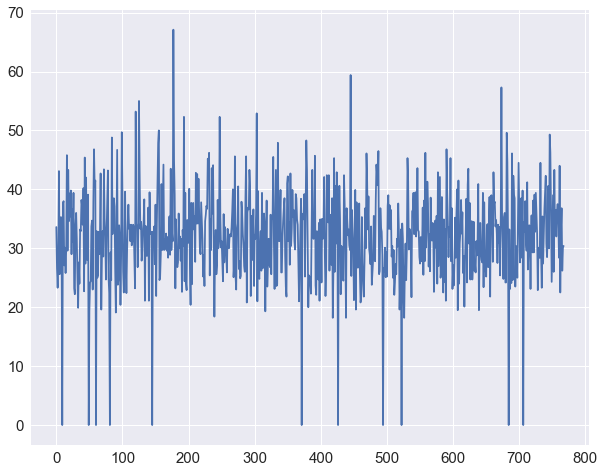

In [16]:
plt.plot(df.BMI)

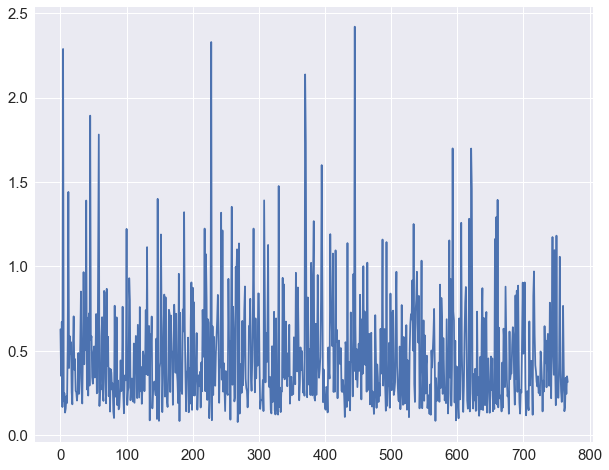

In [17]:
plt.plot(df.DiabetesPedigreeFunction)

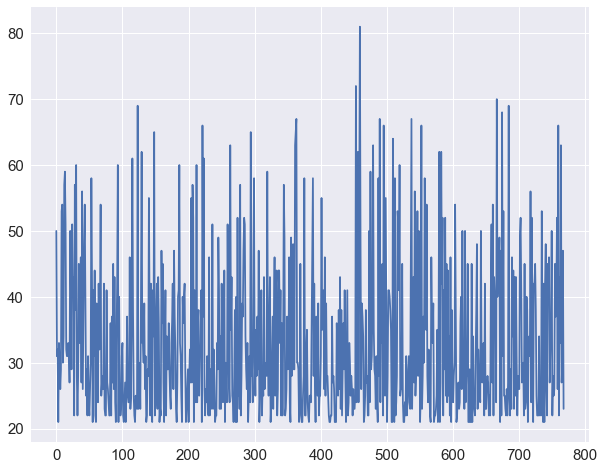

In [18]:
plt.plot(df.Age)

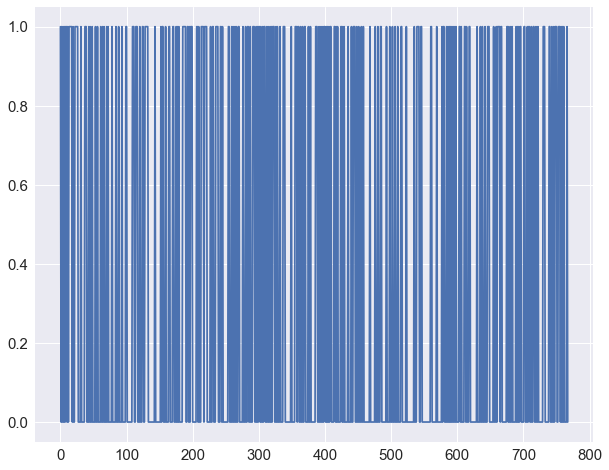

In [19]:
plt.plot(df.Outcome)

# logistic regression

In [20]:
X = df.ix[:,(0,1,2,3,4,5,6,7)].values
y = df.ix[:,8].values

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 200, random_state=25)

In [22]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_pred = LogReg.predict(X_test)

In [24]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.23
Mean Squared Error: 0.23
Root Mean Squared Error: 0.47958315233127197


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[117,  19],
       [ 27,  37]], dtype=int64)

In [26]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements *100
accuracy(confusion_matrix)

77.0

In [30]:
X_train

array([[5.00e+00, 1.09e+02, 7.50e+01, ..., 3.60e+01, 5.46e-01, 6.00e+01],
       [2.00e+00, 8.70e+01, 5.80e+01, ..., 3.27e+01, 1.66e-01, 2.50e+01],
       [5.00e+00, 1.26e+02, 7.80e+01, ..., 2.96e+01, 4.39e-01, 4.00e+01],
       ...,
       [4.00e+00, 1.14e+02, 6.40e+01, ..., 2.89e+01, 1.26e-01, 2.40e+01],
       [3.00e+00, 1.15e+02, 6.60e+01, ..., 3.81e+01, 1.50e-01, 2.80e+01],
       [3.00e+00, 1.70e+02, 6.40e+01, ..., 3.45e+01, 3.56e-01, 3.00e+01]])

In [34]:
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
Pregnancies=5
Glucose=5
BloodPressure=7
SkinThickness=7
Insulin=3
BMI=3
Dpf=3
Age=60
result = loaded_model.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Dpf,Age]])
result


array([0], dtype=int64)

# KNN

In [28]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(LogReg, open(filename, 'wb'))

In [27]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [28]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
y_pred = classifier.predict(X_test)  

In [30]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.85      0.82       136
          1       0.61      0.52      0.56        64

avg / total       0.73      0.74      0.73       200



In [31]:
confusion_matrix

array([[117,  19],
       [ 27,  37]], dtype=int64)

In [32]:
accuracy(confusion_matrix)

77.0

# Decision Tree

In [33]:
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn.metrics import confusion_matrix 
from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [34]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


# gini index 

In [35]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=1) 
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [36]:
y_pred = clf_gini.predict(X_test)
print(y_pred)

[0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1
 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1
 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0
 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1]


In [37]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.255
Mean Squared Error: 0.255
Root Mean Squared Error: 0.5049752469181039


In [38]:
confusion_matrix(y_test, y_pred)

array([[102,  34],
       [ 17,  47]], dtype=int64)

accuracy= (102+47)/200 = 74.5

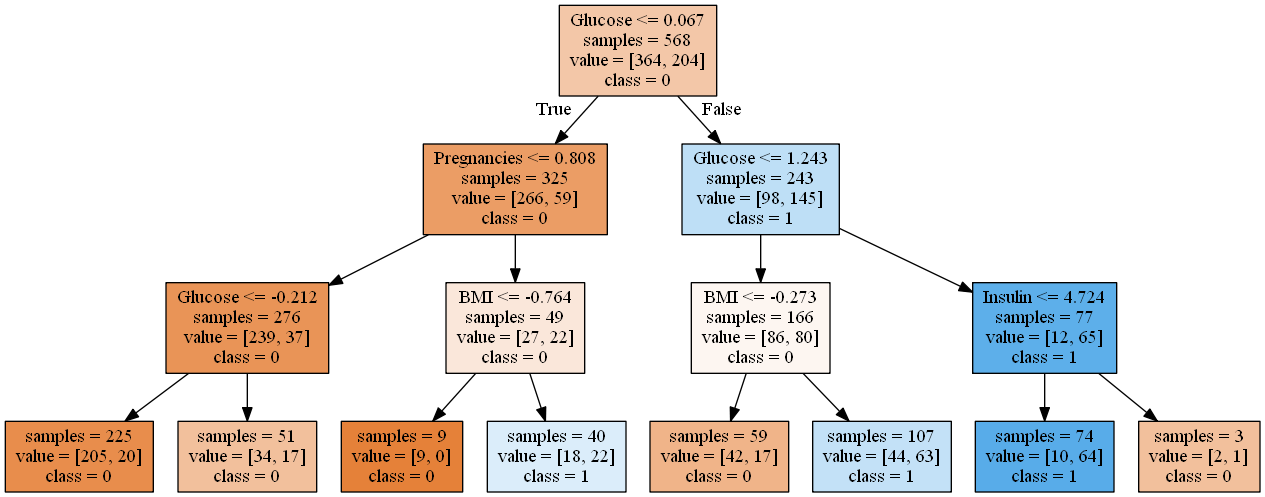

In [39]:
X=df[df.columns[0:-1]]
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini,out_file=dot_data,class_names=["0","1"],feature_names=X.columns,impurity=False,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

 tree with more number of nodes

In [41]:
X=df[df.columns[0:-1]]

Y=df[df.columns[-1]]

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,stratify=Y,random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.818
Accuracy on test set: 0.766


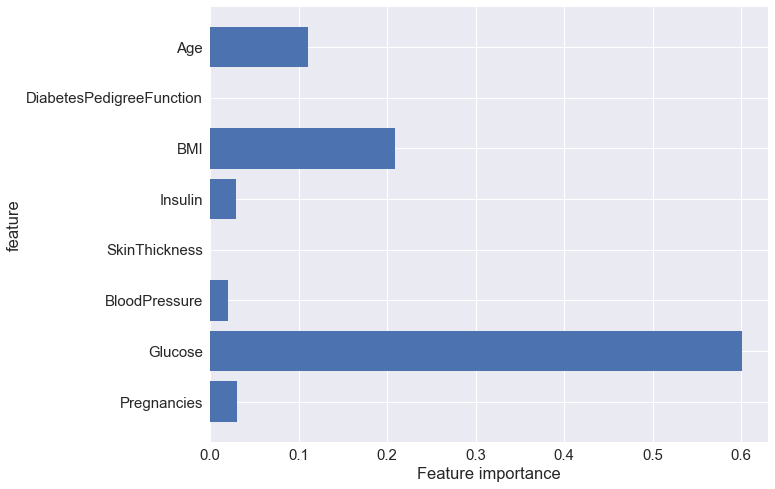

In [43]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_adult_census(model):
    n_features = X.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")
    ##plt.show()
    ##fig=plt.figure()
    plt.savefig("feature_imporatnace_diabetes.png")
    plt.show()
    plt.close()
plot_feature_importances_adult_census(tree)

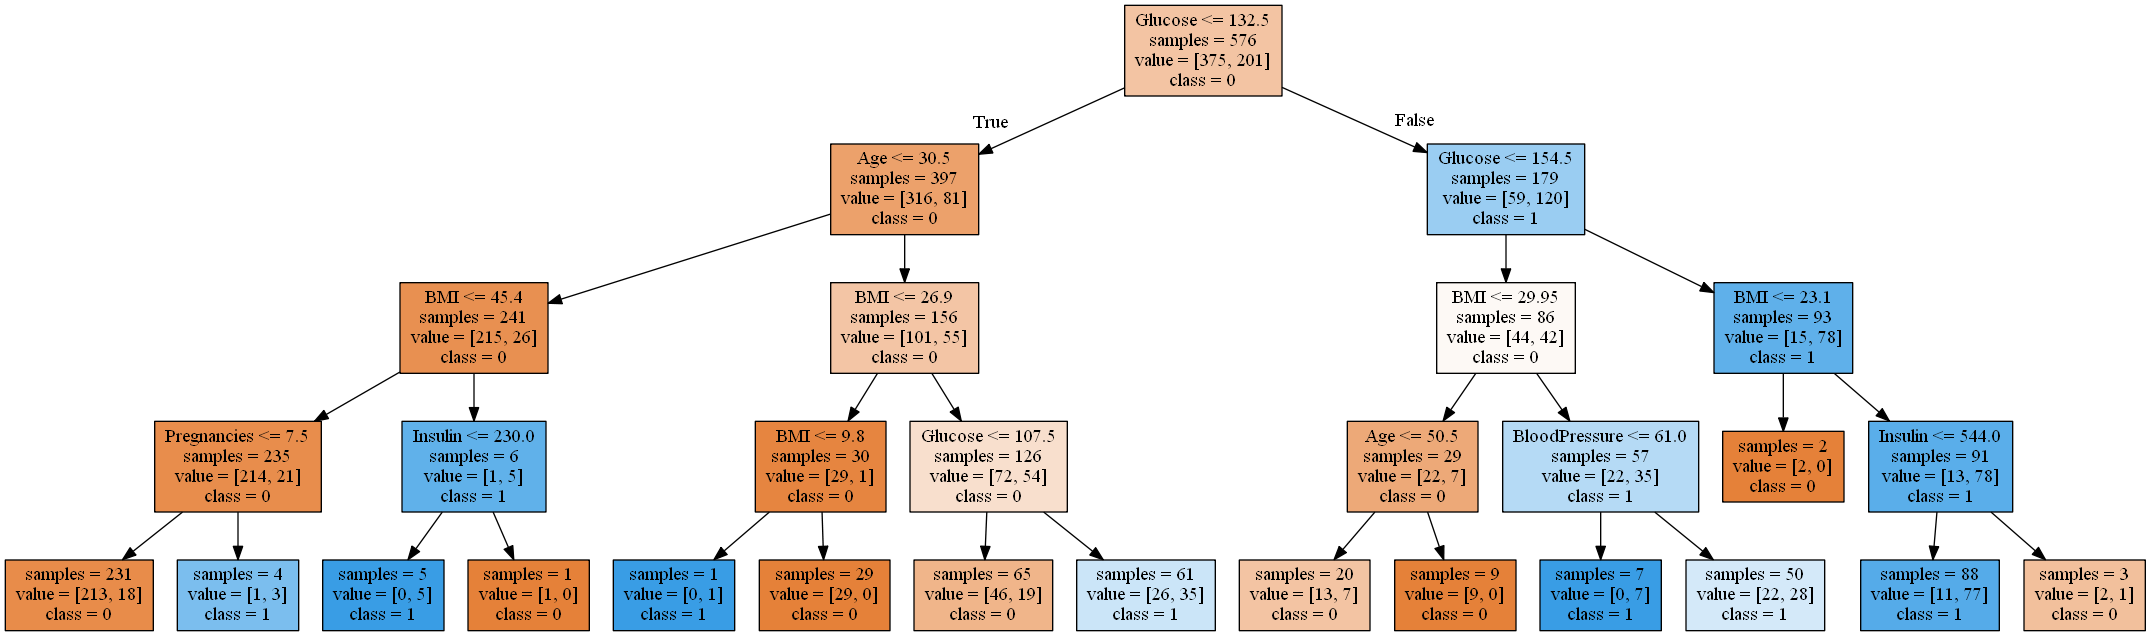

In [44]:
from sklearn.tree import export_graphviz
import pydotplus
import pydotplus
dot_data = StringIO()
export_graphviz(tree,out_file=dot_data,class_names=["0","1"],feature_names=X.columns,impurity=False,filled=True)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


# SVM 

Svm for linear kernel

In [45]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
y_pred = svclassifier.predict(X_test)  

In [47]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2864583333333333
Mean Squared Error: 0.2864583333333333
Root Mean Squared Error: 0.535218024111047


In [48]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))   

[[104  21]
 [ 34  33]]


In [49]:
print(classification_report(y_test,y_pred)) 

             precision    recall  f1-score   support

          0       0.75      0.83      0.79       125
          1       0.61      0.49      0.55        67

avg / total       0.70      0.71      0.71       192



In [50]:
accuracy= (118+39) /200 *100
accuracy

78.5

svm for radial basis function

In [65]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
y_pred = svclassifier.predict(X_test)  

In [67]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  

[[117  19]
 [ 27  37]]


In [68]:
print(classification_report(y_test,y_pred)) 

             precision    recall  f1-score   support

          0       0.81      0.86      0.84       136
          1       0.66      0.58      0.62        64

avg / total       0.76      0.77      0.77       200



In [69]:
accuracy=(117+37)/200
accuracy

0.77

In [51]:
X = df[['Glucose','BMI']]

In [52]:
y = df['Outcome']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [55]:
from sklearn import svm
machine1 = svm.SVC(kernel = 'linear')
machine1.fit(X_train,y_train)
y_pred = machine1.predict(X_test)

In [51]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'v', '^', 'o')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='v',
                    s=55, label='test set')

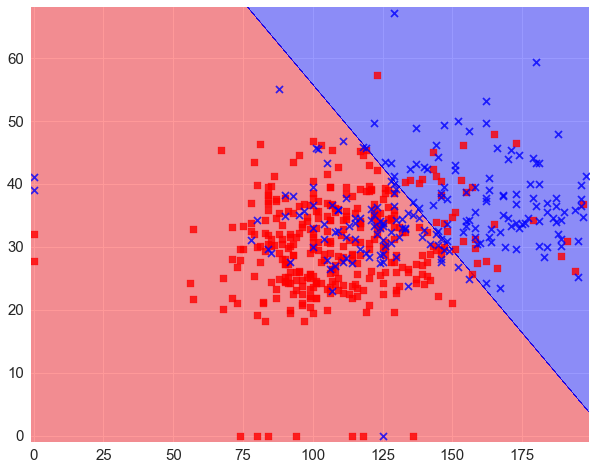

In [52]:
plot_decision_regions(X_train, y_train, machine1)


In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7662337662337663

In [54]:
machine2 = svm.SVC(kernel = 'rbf')
machine2.fit(X_train,y_train)
y_pred2 = machine2.predict(X_test)

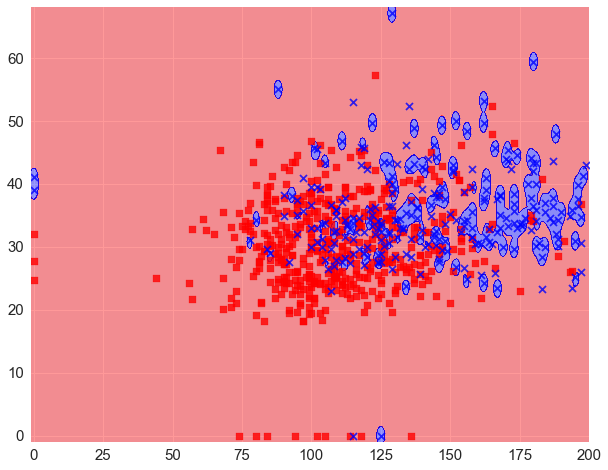

In [55]:
plot_decision_regions(np.array(X), np.array(y), machine2)
plt.show()

In [71]:
accuracy=(117+37)/200
accuracy

0.77

# Random forest

In [56]:
X = df.ix[:,(0,1,2,3,4,5,6,7)].values
y = df.ix[:,8].values

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 200, random_state=25)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [58]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

In [59]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.2905
Mean Squared Error: 0.155825
Root Mean Squared Error: 0.39474675426151384


In [60]:
y_pred = classifier.predict(X_test) 
print(confusion_matrix(y_test, y_pred)) 

[[115  21]
 [ 31  33]]


In [1]:
accuracy=(115+33)/200
accuracy

0.74

In [61]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.85      0.82       136
          1       0.61      0.52      0.56        64

avg / total       0.73      0.74      0.73       200



In [62]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [63]:
regressor.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=209652396, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=398764591, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=924231285, splitter='best'),
 DecisionTreeRegressor

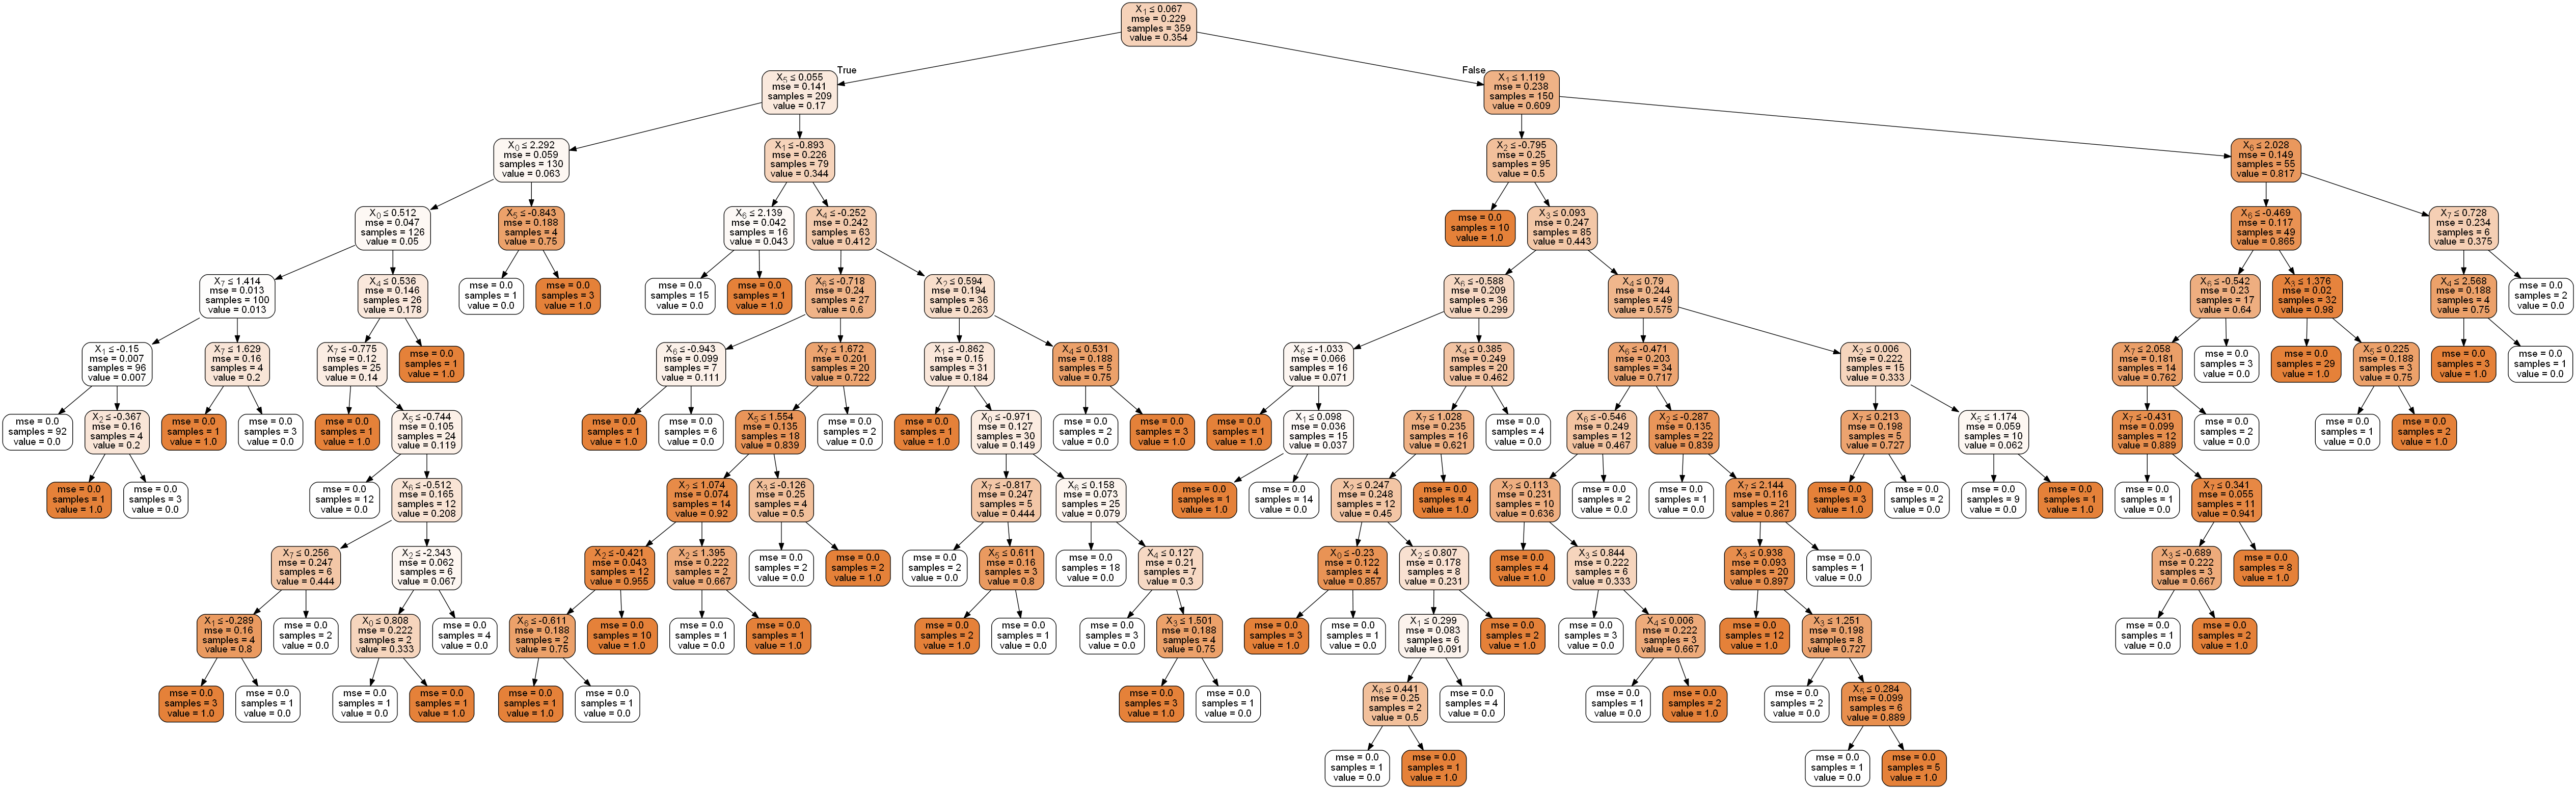

In [64]:
for i in regressor.estimators_:
    dot_data = StringIO()
    export_graphviz(i, out_file=dot_data,filled=True, rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    Image(graph.create_png())
    break;
    
Image(graph.create_png())

# Result

Thus we can say that the main features taken into account are glucose , BMI and age.
And we can say that the most accurate model is the svm model and the logistic regression model both with a accuracy of 77